In [ ]:
#Importar el drive para usar el dataset y carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from seaborn import violinplot
from sklearn.preprocessing import LabelEncoder


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta del archivo en Google Drive
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
counter = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


<ipython-input-3-e48695eea88a>:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  counter = pd.read_csv(name, sep=";")


## Fase 3: Data Preparation

In [ ]:
counter_backup = counter.copy()

In [ ]:
counter_backup.drop(columns=['FirstKillTime'], inplace=True)
counter_backup.drop(columns=['TimeAlive'], inplace=True)
counter_backup.drop(columns=['TravelledDistance'], inplace=True)

### Eliminacion de datos atipicos

In [ ]:
counter_backup.drop(counter_backup[counter_backup['MatchKills'] > 28].index, inplace=True)
counter_backup.shape

(78995, 27)

In [ ]:
counter_backup.drop(counter_backup[counter_backup['MatchAssists'] > 8].index, inplace=True)
counter_backup.shape

(78710, 27)

In [ ]:
label_encoder = LabelEncoder()
counter_backup['Team'] = label_encoder.fit_transform(counter_backup['Team'])
counter_backup['Map'] = label_encoder.fit_transform(counter_backup['Map'])

In [ ]:
counter_backup['Map'].unique()

array([1, 3, 2, 0])

In [ ]:
counter_backup.RoundWinner = counter_backup.RoundWinner.astype(bool)
counter_backup.MatchWinner = counter_backup.MatchWinner.astype(bool)
# Conversion
counter_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
counter_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
counter_backup.Survived.replace({True: 1, False: 0}, inplace=True)

In [ ]:
# Revisiom
counter_backup.info()
# Vista previa
counter_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78710 entries, 0 to 79156
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   78710 non-null  int64  
 1   Map                          78710 non-null  int64  
 2   Team                         78710 non-null  int64  
 3   InternalTeamId               78710 non-null  int64  
 4   MatchId                      78710 non-null  int64  
 5   RoundId                      78710 non-null  int64  
 6   RoundWinner                  78710 non-null  int64  
 7   MatchWinner                  78710 non-null  int64  
 8   Survived                     78710 non-null  int64  
 9   AbnormalMatch                78710 non-null  bool   
 10  RLethalGrenadesThrown        78710 non-null  int64  
 11  RNonLethalGrenadesThrown     78710 non-null  int64  
 12  PrimaryAssaultRifle          78710 non-null  float64
 13  PrimarySniperRifle   

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,1,1,1,4,1,1,1,0,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,1,1,1,4,1,1,1,0,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,1,1,1,4,1,1,1,0,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,1,1,1,4,1,1,1,0,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,1,1,1,4,1,1,1,1,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
# Limitar numero de rondas
counter_backup = counter_backup[(counter_backup['RoundId'] >= 1) & (counter_backup['RoundId'] <= 30)]

counter_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

### Random forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Suponiendo que tu DataFrame original es df
# Variables para predecir
X = counter_backup[['RoundHeadshots', 'RoundKills']]
y = counter_backup['RoundWinner']

# Partición en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



=== Random Forest Results ===
Accuracy: 0.7082432260526651
              precision    recall  f1-score   support

           0       0.56      0.02      0.04      4608
           1       0.71      0.99      0.83     11114

    accuracy                           0.71     15722
   macro avg       0.63      0.51      0.44     15722
weighted avg       0.67      0.71      0.60     15722

[[  102  4506]
 [   81 11033]]


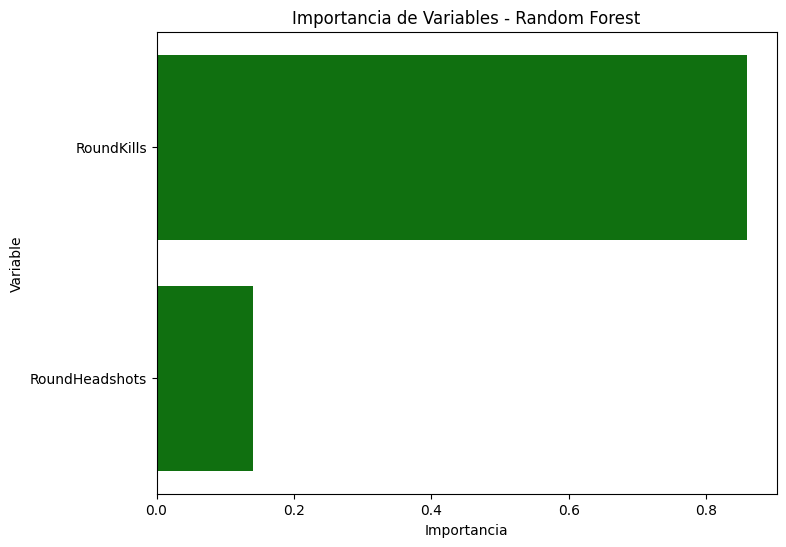

In [ ]:
import pandas as pd
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=feature_importance_df, x='Importancia', y='Variable', color='green')
plt.title("Importancia de Variables - Random Forest")
plt.show()
